## Basic simulation
* https://github.com/LFPy/LFPy

In [1]:
# import modules
import LFPy
from LFPy import Cell, Synapse, LineSourcePotential
import numpy as np
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [2]:
# create Cell
cell = Cell(morphology=''.join(LFPy.__path__ +
                               ['/test/ball_and_sticks.hoc']),
            passive=True,  # NEURON 'pas' mechanism
            tstop=100,  # ms
           )

* above code creates a simple neuron as following

ball_and_Y.hoc

This hoc file creates a neuron of the following shape:

            \       
             \     
              \   /
               \ /
                V
                |
                |
                |
                O
                
Note the conventions:
 - soma needs to be a list (soma[0], not soma),
 - use soma for the soma compartment,
 - use a name starting with dend for the dendrites.


In [3]:
# create Synapse
synapse = Synapse(cell=cell,
                  idx=cell.get_idx("soma[0]"),  # soma segment index
                  syntype='Exp2Syn',  # two-exponential synapse
                  weight=0.005,  # max conductance (uS)
                  e=0,  # reversal potential (mV)
                  tau1=0.5,  # rise time constant
                  tau2=5.,  # decay time constant
                  record_current=True,  # record synapse current
                 )
synapse.set_spike_times(np.array([20., 40]))  # set activation times

In [4]:
# create extracellular predictor
lsp = LineSourcePotential(cell=cell,
                          x=np.zeros(11) + 10,  # x-coordinates of contacts (µm)
                          y=np.zeros(11),  # y-coordinates
                          z=np.arange(11)*20,  # z-coordinates
                          sigma=0.3,  # extracellular conductivity (S/m)
                         )

In [5]:
# execute simulation
cell.simulate(probes=[lsp])  # compute measurements at run time

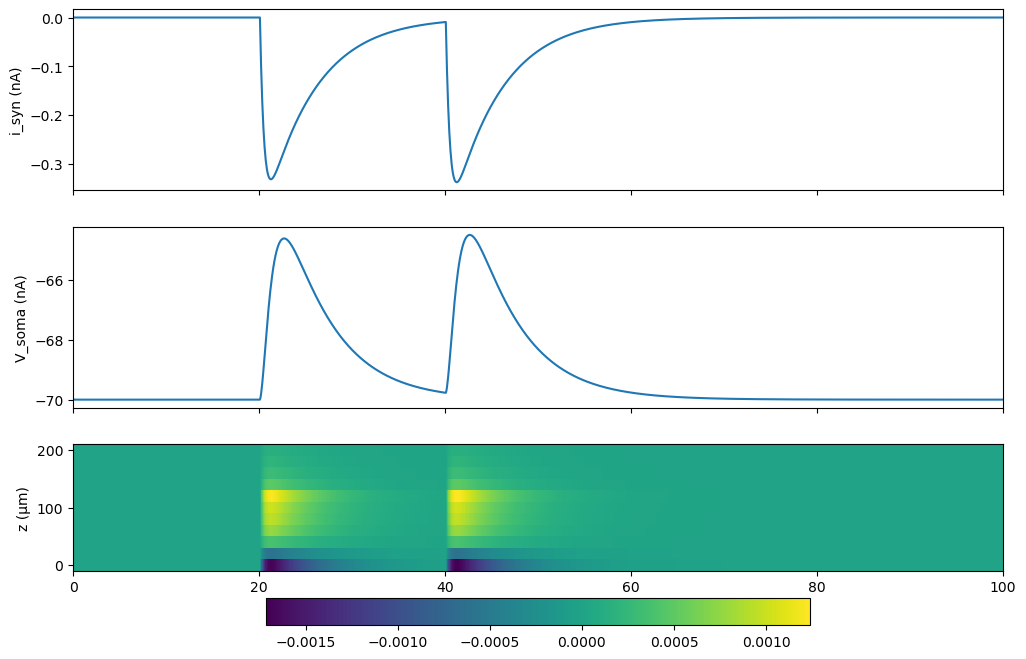

In [6]:
# plot results
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
axes[0].plot(cell.tvec, synapse.i)
axes[0].set_ylabel('i_syn (nA)')
axes[1].plot(cell.tvec, cell.somav)
axes[1].set_ylabel('V_soma (nA)')
axes[2].pcolormesh(cell.tvec, lsp.z, lsp.data, shading='auto')
axes[2].set_ylabel('z (µm)')
axes[2].set_xlabel('t (ms)')
plt.colorbar(axes[2].pcolormesh(cell.tvec, lsp.z, lsp.data, shading='auto'), ax=axes[2], orientation='horizontal')


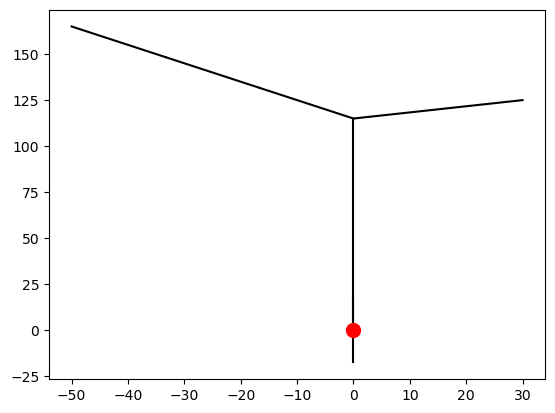

In [7]:
plt.plot(cell.x.T, cell.z.T, 'k')
plt.plot(synapse.x, synapse.z,
         color='r', marker='o', markersize=10)